# Mineria de Datos ICF-1018 
* numpy
* sklearn
* seaborn

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
(n_samples, n_features), n_digits = X.shape, np.unique(y).size

In [2]:
n_digits

10

### Inicializacion de Kmeans

In [13]:
# Usamos dos centroides difetentes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans_1 = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
# Selecciona centroides de manera que se maximice la distancia entre ellos.

kmeans_2 = KMeans(init="random", n_clusters=n_digits, n_init=4)
# Selecciona centroides de manera aletoria.

### Creamos un Pipeline

Secuencia estructurada de pasos que incluyen transformaciones y un modelo de aprendizaje. Su objetivo principal es automatizar el proceso de preprocesamiento, entrenamiento y evaluación de un modelo. Un pipeline hace que el código sea más limpio y fácil de reutilizar.

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

estimator_1 = make_pipeline(MinMaxScaler(), kmeans_1).fit(X)
estimator_2 = make_pipeline(MinMaxScaler(), kmeans_2).fit(X)

In [12]:

print(silhouette_score(X, estimator_1[-1].labels_, metric="euclidean",))
print(silhouette_score(X, estimator_2[-1].labels_, metric="euclidean",))

0.18204961062052635
0.17646009694837428


In [18]:
for i in range(2,20):
    kmeans_1 = KMeans(init="k-means++", n_clusters=i, n_init=4)
    kmeans_2 = KMeans(init="random", n_clusters=i, n_init=4)
    estimator_1 = make_pipeline(MinMaxScaler(), kmeans_1).fit(X)
    estimator_2 = make_pipeline(MinMaxScaler(), kmeans_2).fit(X)

    print(f'para {i} cluster en kmeans_1 el score es:',silhouette_score(X, estimator_1[-1].labels_, metric="euclidean",))
    print(f'para {i} cluster en kmeans_2 el score es:',silhouette_score(X, estimator_2[-1].labels_, metric="euclidean",))
    print('\n')

para 2 cluster en kmeans_1 el score es: 0.11824396471614179
para 2 cluster en kmeans_2 el score es: 0.11824396471614179


para 3 cluster en kmeans_1 el score es: 0.1266238202083401
para 3 cluster en kmeans_2 el score es: 0.12654248098912904


para 4 cluster en kmeans_1 el score es: 0.12801367273275174
para 4 cluster en kmeans_2 el score es: 0.12804541676339262


para 5 cluster en kmeans_1 el score es: 0.1392135168005931
para 5 cluster en kmeans_2 el score es: 0.13587501294559218


para 6 cluster en kmeans_1 el score es: 0.14286494984806852
para 6 cluster en kmeans_2 el score es: 0.1462873129336225


para 7 cluster en kmeans_1 el score es: 0.16456784980193198
para 7 cluster en kmeans_2 el score es: 0.1634627904252309


para 8 cluster en kmeans_1 el score es: 0.17892858382130544
para 8 cluster en kmeans_2 el score es: 0.17518182092797777


para 9 cluster en kmeans_1 el score es: 0.18934166006495676
para 9 cluster en kmeans_2 el score es: 0.189487145869611


para 10 cluster en kmeans_1 el

El Silhouette score es una métrica que se utiliza para evaluar la calidad de un clustering. El score varía entre -1 y 1:

* Un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus clusters y que los clusters están bien separados entre sí.
* Un valor cercano a 0 sugiere que los clusters están solapados, y los puntos podrían estar mal asignados.
* Un valor negativo indica que los puntos podrían estar asignados al cluster incorrecto, lo que refleja una pobre separación entre los clusters.


Para k=  6 Silhouette score promedio:  0.1515193602906724
Para k=  7 Silhouette score promedio:  0.15970386373494838
Para k=  8 Silhouette score promedio:  0.1753728786135153
Para k=  9 Silhouette score promedio:  0.18922347802429693
Para k=  10 Silhouette score promedio:  0.18789201847355977
Para k=  11 Silhouette score promedio:  0.18309238158595645
Para k=  12 Silhouette score promedio:  0.18068231338255583


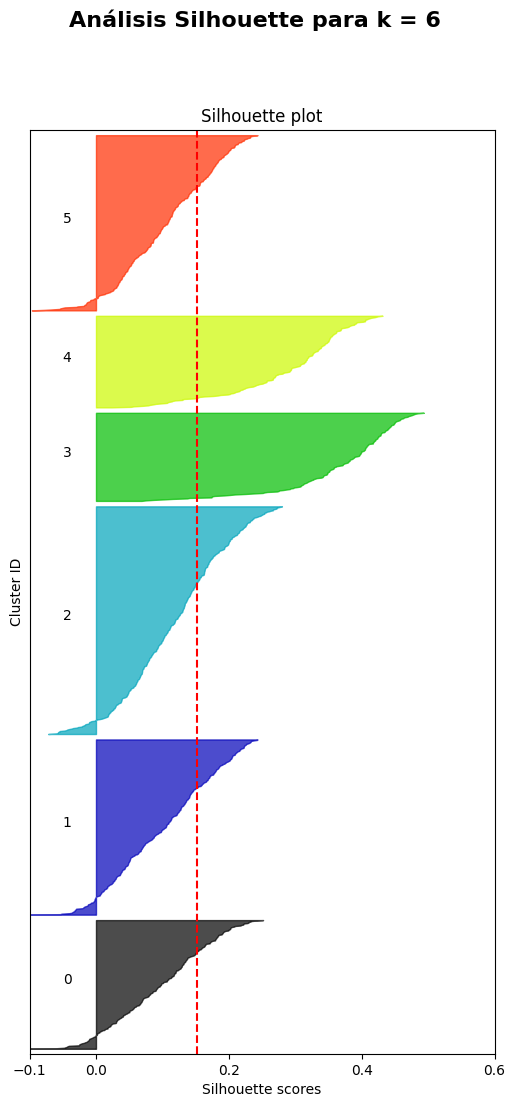

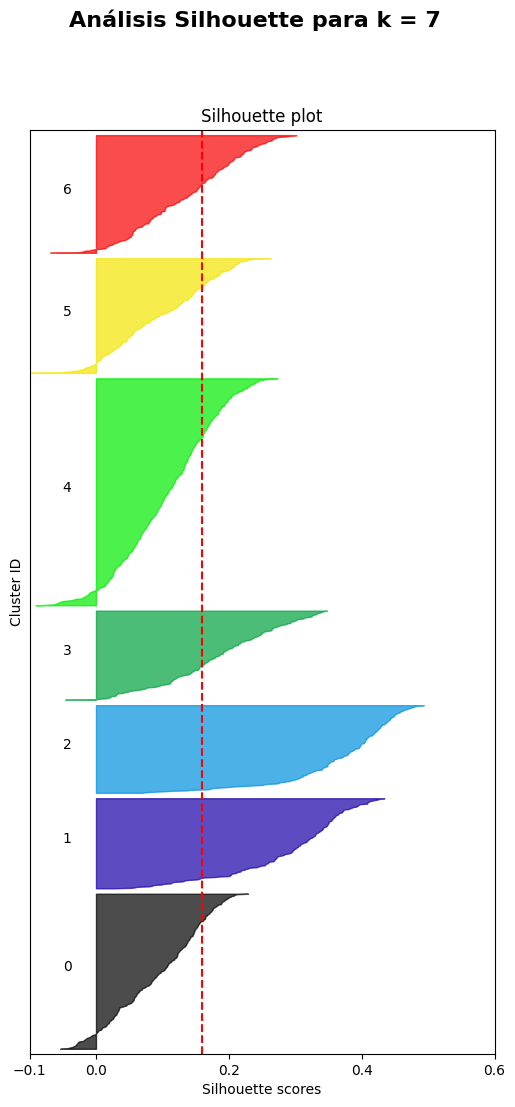

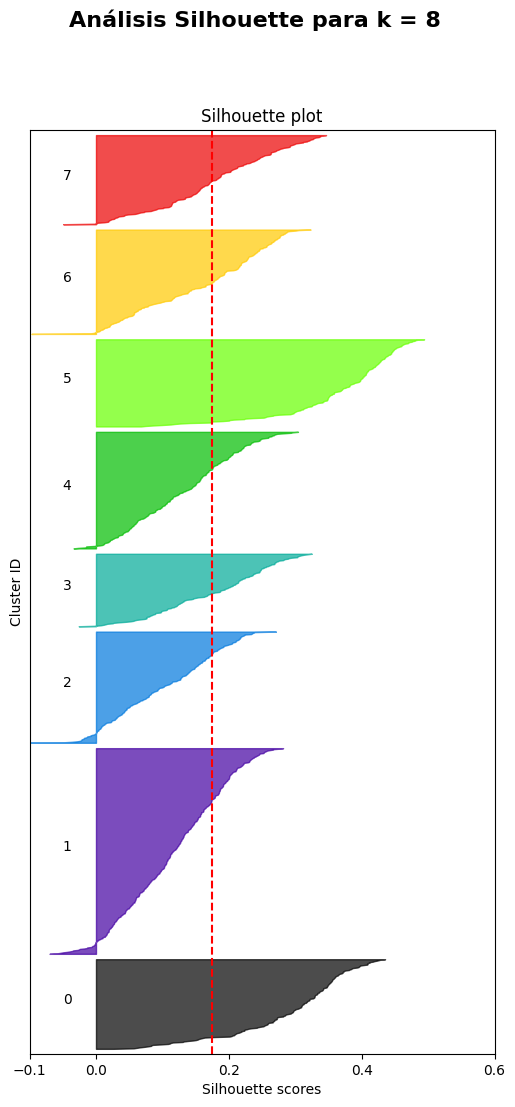

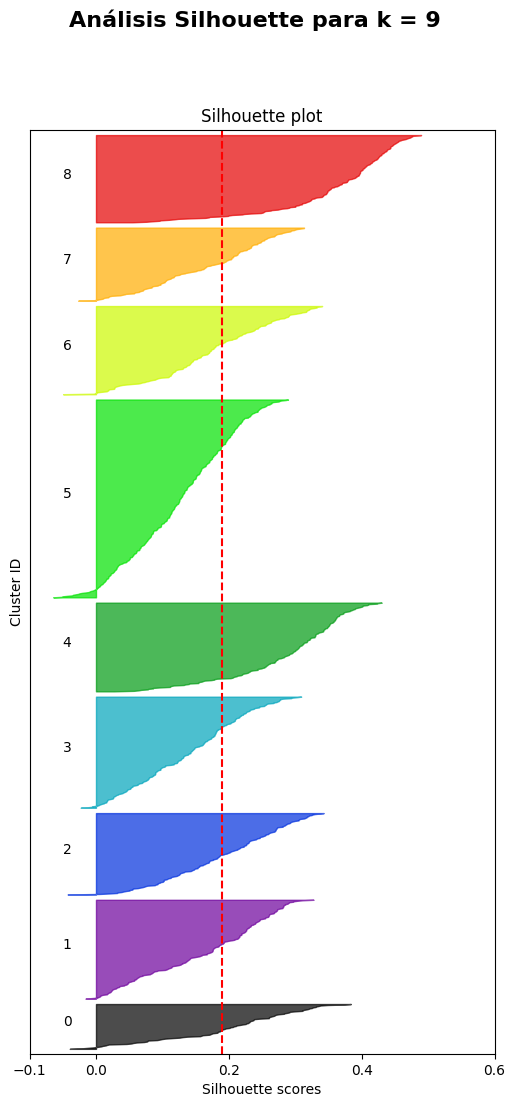

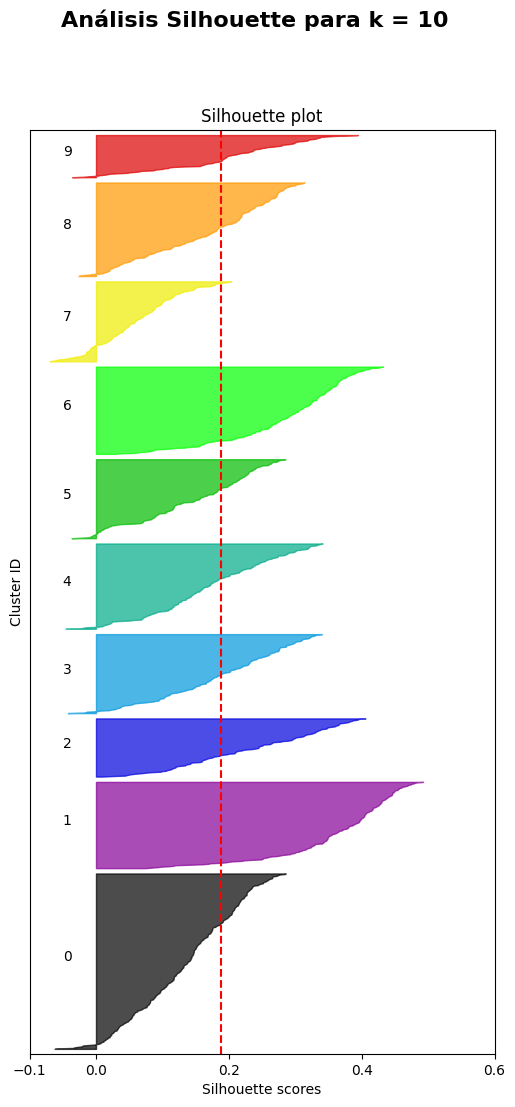

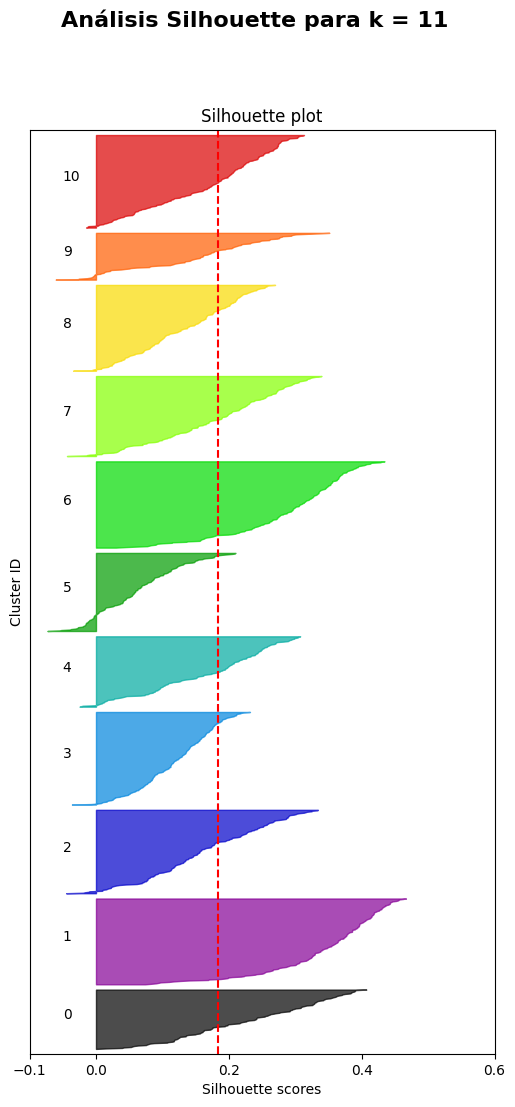

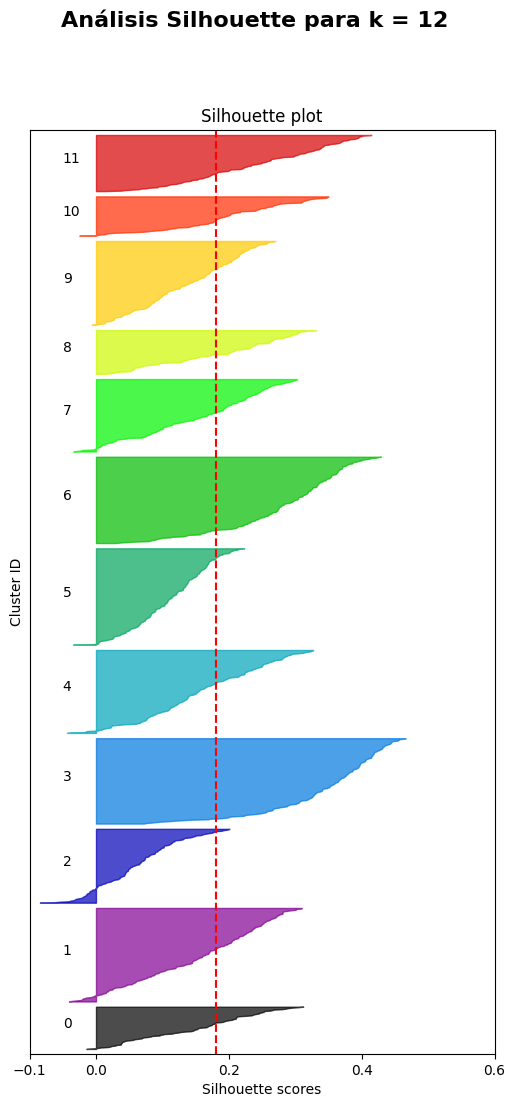

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

range_n_clusters = [6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    
    fig, ax = plt.subplots(figsize=(6, 12))
    

    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

    cluster_labels = estimator.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para k= ",
        n_clusters,
        "Silhouette score promedio: ",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette scores")
    ax.set_ylabel("Cluster ID")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


    plt.suptitle(
        "Análisis Silhouette para k = %d"
        % n_clusters,
        fontsize=16,
        fontweight="bold",
    )

plt.show()

# Actividad en clase

## Clusterice el dataset usando Kmeans. Para esto haga lo siguiente:

1. Preprocese los datos y reduzca la dimensionalidad del sample de manera que retenga el 90% de la varianza.
2. Corra kmeans con inicialización random para valores de k en el rango [5, 6, 7, 8, 9, 10].
3. Determine el mejor valor de k según el Silhouette score promedio.
4. ¿Cuál valor de k usaría?
5. Sobre el dataset PCa a 90%, elimine outliers en base al histograma de LOFs. Justifique el umbral de corte.
6. Elimine los outliers del dataset.
7. Corra kmeans con inicialización random para valores de k en el rango [5, 6, 7, 8, 9, 10].
8. Determine el mejor valor de k según el Silhouette score promedio.
9. ¿Cuál valor de k usaría?
10. ¿Qué cambió al eliminar los outliers?


In [21]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.data.shape)

(581012, 54)


In [22]:
import random
random_numbers = random.sample(range(covtype.data.shape[0]), 10000)
sample = covtype.data[random_numbers,:]

In [25]:
sample.shape

(10000, 54)